# ML Answers

- **Answer Set**: No. 01
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [10]:
import numpy as np
import sklearn as sk
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.tree
import sklearn.metrics
import xgboost as xgb
import matplotlib.pyplot as plt

### Dataset

Now we can load our dataset:

In [11]:
labels = np.loadtxt("../lib/labels.txt", dtype=str, delimiter='\n', skiprows=0)
data_set = np.loadtxt("../lib/data.txt", delimiter=',', skiprows=0)

np.random.shuffle(data_set)

train_set = data_set[0:4000, :]
test_set = data_set[4000:-1, :]

train_features = train_set[:, :-1]
train_labels = (train_set[:, -1] - 1).astype(int)

test_features = test_set[:, :-1]
test_labels = (test_set[:, -1] - 1).astype(int)

print(f"Train Features: {train_features.shape}")
print(f"Test Features: {test_features.shape}")

Train Features: (4000, 534)
Test Features: (479, 534)


---

## Problem

In this problem, we are going to fit four types of models, before training each model, we will do a `Grid Search` with `Cross Validation` to find the best hyper parameters for the model.

### Decision Tree

In [12]:
decision_tree_model = sk.model_selection.GridSearchCV(
    estimator=sk.tree.DecisionTreeClassifier(), 
    param_grid={
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

decision_tree_predicts = decision_tree_model.predict(test_features)

### Random Forest

In [13]:
random_forest_model = sk.model_selection.GridSearchCV(
    estimator=sk.ensemble.RandomForestClassifier(), 
    param_grid={
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

random_forest_predicts = random_forest_model.predict(test_features)

### XGBoost

In [14]:
xgb.set_config(verbosity=0)

xgboost_model = sk.model_selection.GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False), 
    param_grid={},
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

xgboost_predicts = xgboost_model.predict(test_features)

### SVM

In [15]:
svm_model = sk.model_selection.GridSearchCV(
    estimator=sk.svm.SVC(), 
    param_grid={
        "C": [100000],
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

svm_predicts = svm_model.predict(test_features)

### Results

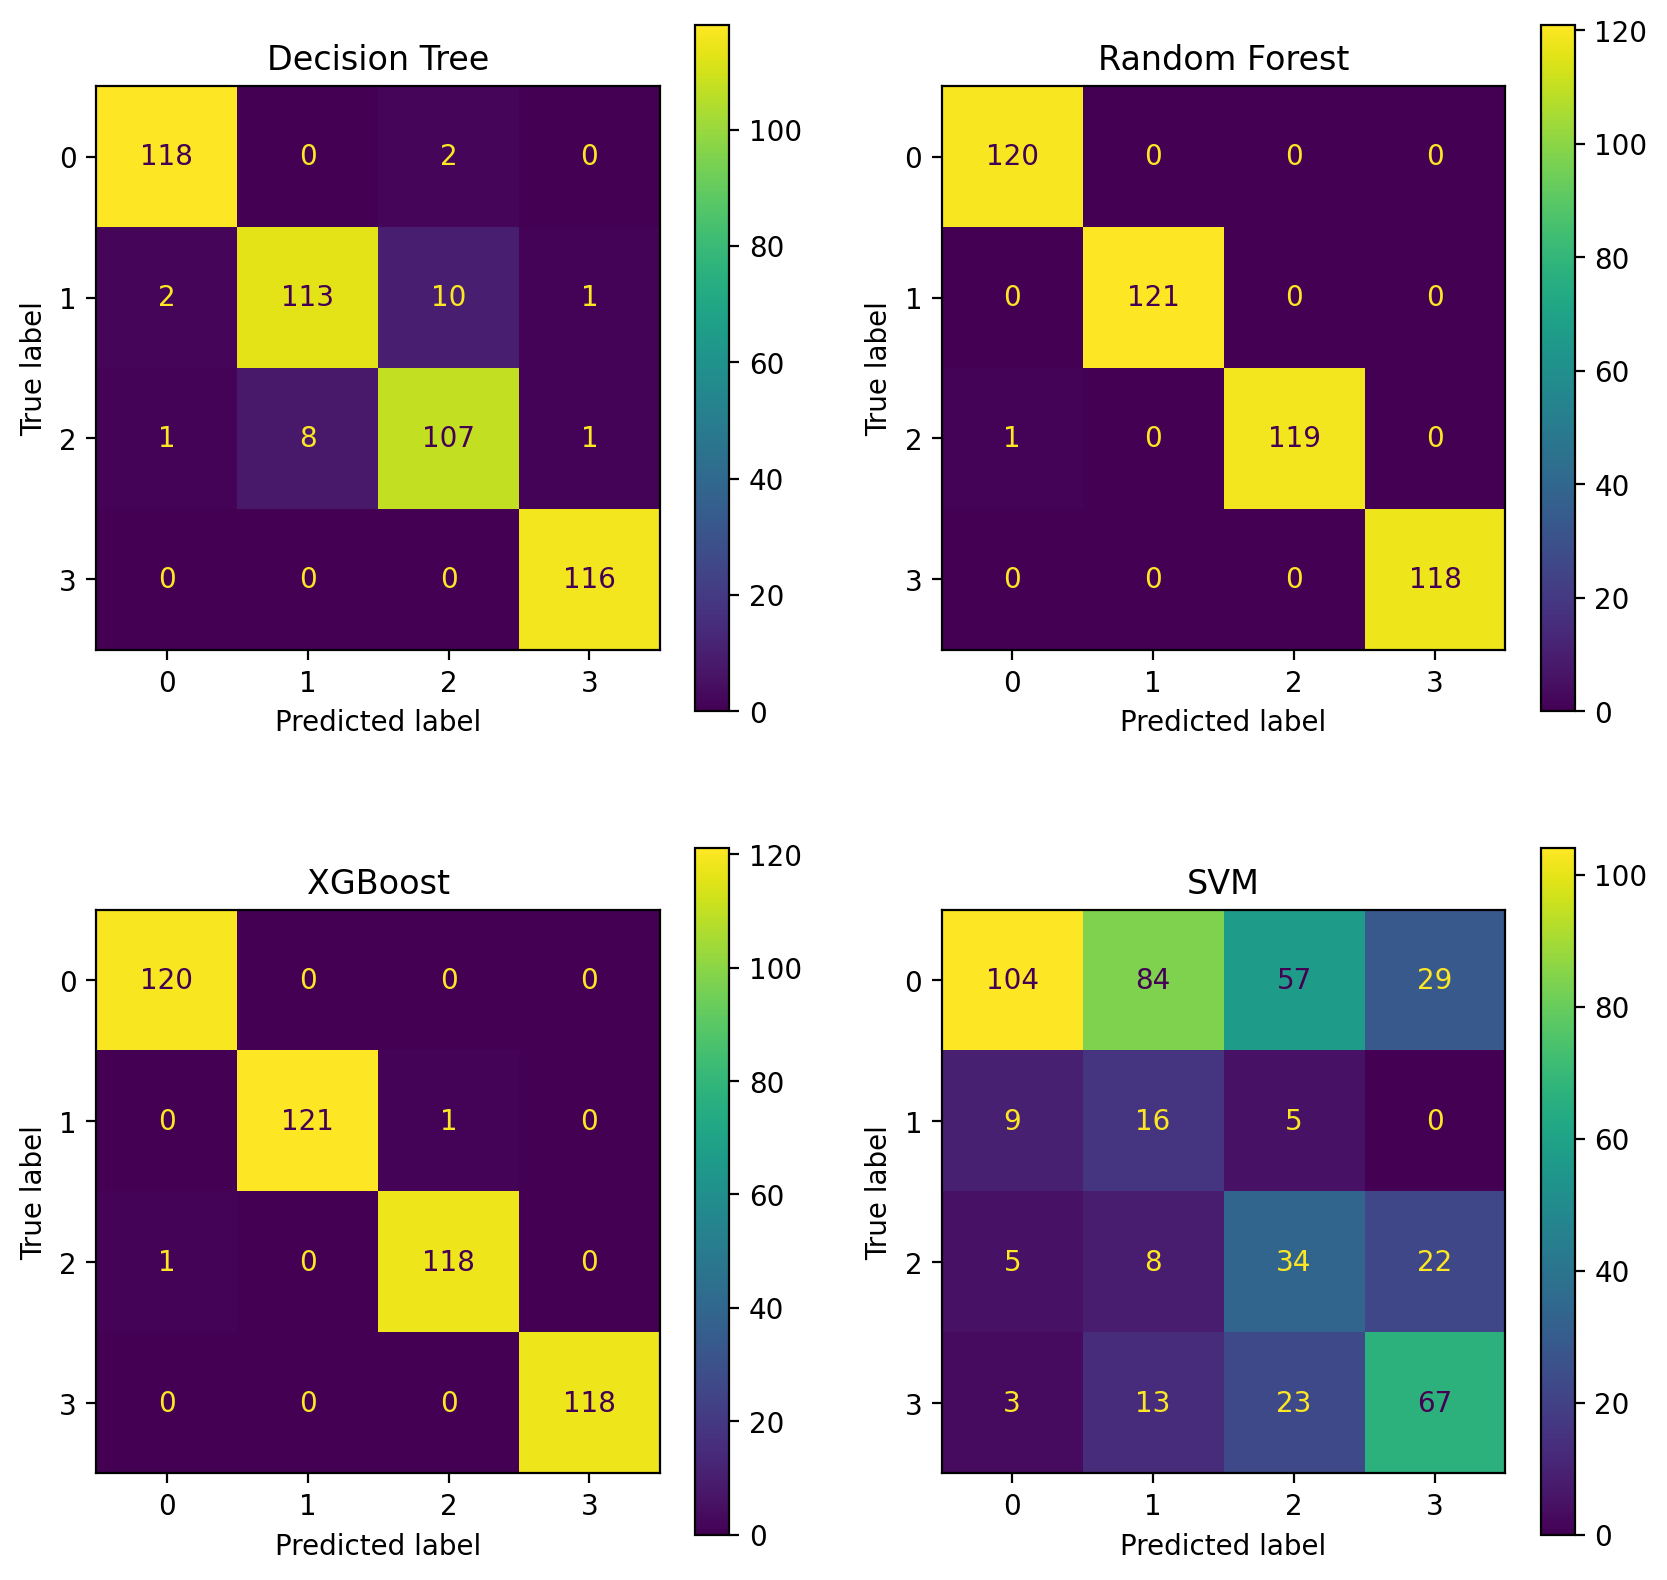

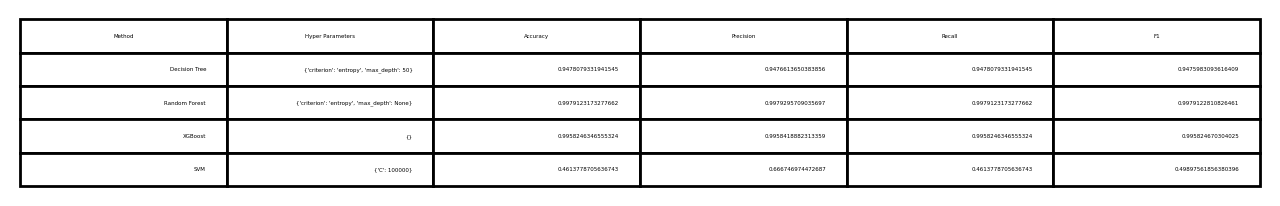

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=200)
axes = axes.flatten()

axes[0].set_title("Decision Tree")
sk.metrics.ConfusionMatrixDisplay.from_predictions(
    decision_tree_predicts,
    test_labels,
    ax=axes[0]
)

axes[1].set_title("Random Forest")
sk.metrics.ConfusionMatrixDisplay.from_predictions(
    random_forest_predicts,
    test_labels,
    ax=axes[1]
)

axes[2].set_title("XGBoost")
sk.metrics.ConfusionMatrixDisplay.from_predictions(
    xgboost_predicts,
    test_labels,
    ax=axes[2]
)

axes[3].set_title("SVM")
sk.metrics.ConfusionMatrixDisplay.from_predictions(
    svm_predicts,
    test_labels,
    ax=axes[3]
)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
plt.table(cellText=[
    [
        "Decision Tree",
        decision_tree_model.best_params_,
        sk.metrics.accuracy_score(decision_tree_predicts, test_labels),
        sk.metrics.precision_score(decision_tree_predicts, test_labels, average="weighted"),
        sk.metrics.recall_score(decision_tree_predicts, test_labels, average="weighted"),
        sk.metrics.f1_score(decision_tree_predicts, test_labels, average="weighted")
    ],
    [
        "Random Forest",
        random_forest_model.best_params_,
        sk.metrics.accuracy_score(random_forest_predicts, test_labels),
        sk.metrics.precision_score(random_forest_predicts, test_labels, average="weighted"),
        sk.metrics.recall_score(random_forest_predicts, test_labels, average="weighted"),
        sk.metrics.f1_score(random_forest_predicts, test_labels, average="weighted")
    ],
    [
        "XGBoost",
        xgboost_model.best_params_,
        sk.metrics.accuracy_score(xgboost_predicts, test_labels),
        sk.metrics.precision_score(xgboost_predicts, test_labels, average="weighted"),
        sk.metrics.recall_score(xgboost_predicts, test_labels, average="weighted"),
        sk.metrics.f1_score(xgboost_predicts, test_labels, average="weighted")
    ],
    [
        "SVM",
        svm_model.best_params_,
        sk.metrics.accuracy_score(svm_predicts, test_labels),
        sk.metrics.precision_score(svm_predicts, test_labels, average="weighted"),
        sk.metrics.recall_score(svm_predicts, test_labels, average="weighted"),
        sk.metrics.f1_score(svm_predicts, test_labels, average="weighted")
    ]
], colLabels=["Method", "Hyper Parameters", "Accuracy", "Precision", "Recall", "F1"], loc="center")
plt.axis("off")
plt.show()

---